## Import Required Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Load Vote Data

In [8]:
# Load the CSV file
df = pd.read_csv('formspree_meoylrkk_2025-12-14T18_23_52_export.csv')

# Display first few rows
print("Data Preview:")
print(df.head())

# Display data info
print("\nData Info:")
print(df.info())

# Display shape
print(f"\nTotal records: {len(df)}")

Data Preview:
                              _date                      _subject  \
0  2025-12-14T13:49:24.482548+00:00   Vote: Claude Implementation   
1  2025-12-14T00:02:57.626868+00:00  Vote: Kimi K2 Implementation   
2  2025-12-13T12:17:16.639644+00:00   Vote: Claude Implementation   
3  2025-12-13T11:23:08.258816+00:00   Vote: Claude Implementation   
4  2025-12-13T10:53:50.066922+00:00   Vote: Claude Implementation   

  implementation      implementationName                 timestamp  \
0         claude   Claude Implementation  2025-12-14T13:49:23.977Z   
1           kimi  Kimi K2 Implementation  2025-12-14T00:02:56.788Z   
2         claude   Claude Implementation  2025-12-13T12:17:12.160Z   
3         claude   Claude Implementation  2025-12-13T11:23:09.378Z   
4         claude   Claude Implementation  2025-12-13T10:53:49.855Z   

                                             _status  
0  {'info@mariasukhareva.com': {'error': '550 5.7...  
1  {'info@mariasukhareva.com': {'error':

## Count Votes by Implementation

In [9]:
# Count votes for each implementation
vote_counts = df['implementationName'].value_counts()

print("Vote Counts:")
print(vote_counts)
print(f"\nTotal votes: {vote_counts.sum()}")

Vote Counts:
implementationName
Claude Implementation     59
MiniMax Implementation    37
Gemini Implementation     30
Kimi K2 Implementation    20
ChatGPT Implementation     7
Name: count, dtype: int64

Total votes: 153


## Visualize Results as Bar Chart

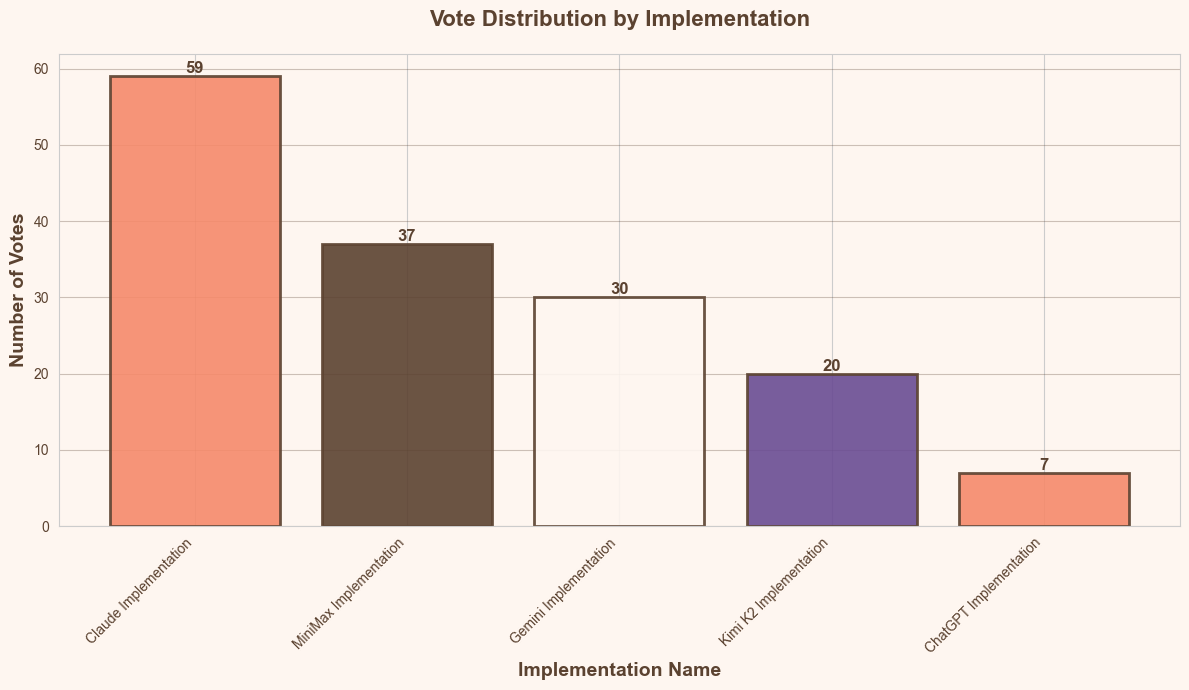

In [ ]:
# Define custom color palette
custom_colors = ['#f68a6b', '#5b4230', '#f9b918', '#6a4c93', '#fef6f0']

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 7), facecolor='#fef6f0')
ax.set_facecolor('#fef6f0')

# Use custom colors, cycling through them if needed
bar_colors = [custom_colors[i % len(custom_colors)] for i in range(len(vote_counts))]
bars = ax.bar(vote_counts.index, vote_counts.values, color=bar_colors, edgecolor='#5b4230', linewidth=2, alpha=0.9)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='#5b4230')

# Customize the plot
ax.set_xlabel('Implementation Name', fontsize=14, fontweight='bold', color='#5b4230')
ax.set_ylabel('Number of Votes', fontsize=14, fontweight='bold', color='#5b4230')
ax.set_title('Vote Distribution by Implementation', fontsize=16, fontweight='bold', pad=20, color='#5b4230')
ax.tick_params(axis='x', rotation=45, labelcolor='#5b4230')
ax.tick_params(axis='y', labelcolor='#5b4230')
plt.setp(ax.get_xticklabels(), ha='right')
ax.grid(axis='y', alpha=0.3, color='#5b4230')
plt.tight_layout()

# Show the plot
plt.show()

## Summary Statistics

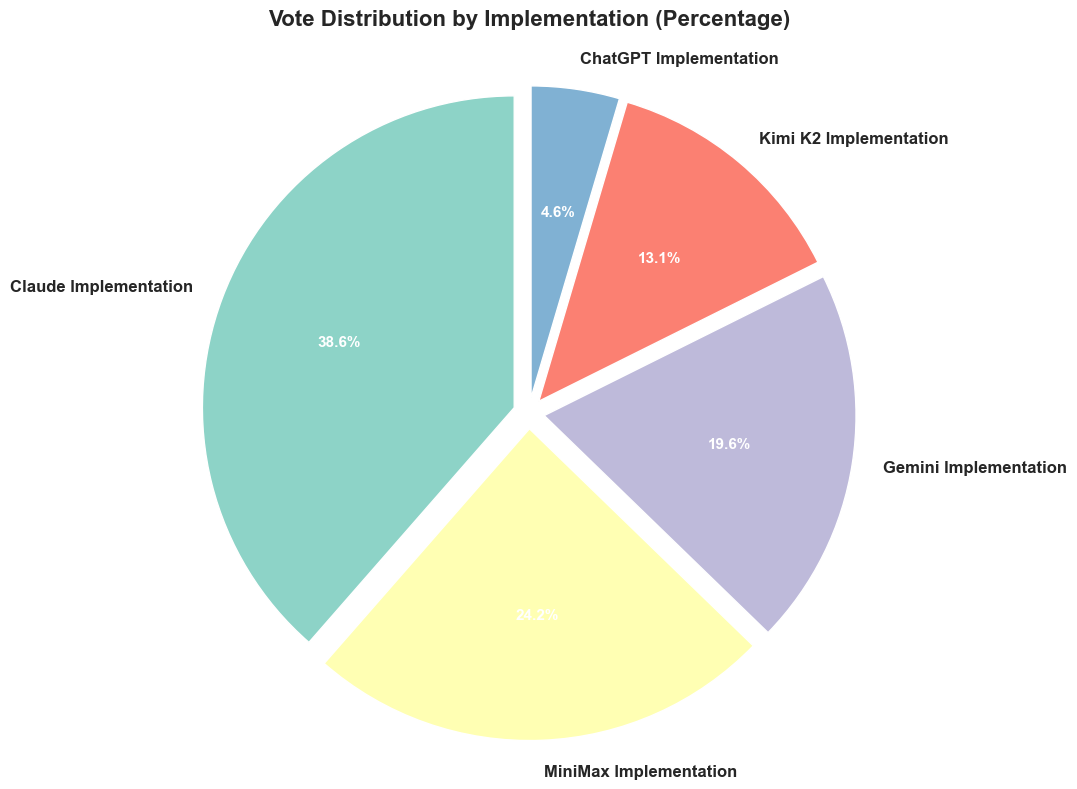

In [ ]:
# Define custom color palette
custom_colors = ['#f68a6b', '#5b4230', '#f9b918', '#6a4c93', '#f68a6b', '#5b4230']

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 8), facecolor='#fef6f0')

# Use custom colors, cycling through them if needed
pie_colors = [custom_colors[i % len(custom_colors)] for i in range(len(vote_counts))]
wedges, texts, autotexts = ax.pie(vote_counts.values, 
                                    labels=vote_counts.index, 
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=pie_colors,
                                    explode=[0.05] * len(vote_counts),
                                    textprops={'color': '#5b4230'})

# Customize text
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
    text.set_color('#5b4230')
    
for autotext in autotexts:
    autotext.set_color('#fef6f0')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

ax.set_title('Vote Distribution by Implementation (Percentage)', fontsize=16, fontweight='bold', pad=20, color='#5b4230')
plt.axis('equal')
plt.tight_layout()

# Show the plot
plt.show()

## Visualize Results as Pie Chart

In [11]:
# Display summary statistics
print("Vote Summary:")
print(f"Total implementations: {len(vote_counts)}")
print(f"Total votes: {vote_counts.sum()}")
print(f"\nWinner: {vote_counts.idxmax()} with {vote_counts.max()} votes")
print(f"\nVote percentages:")
vote_percentages = (vote_counts / vote_counts.sum() * 100).round(2)
for impl, pct in vote_percentages.items():
    print(f"  {impl}: {pct}%")

Vote Summary:
Total implementations: 5
Total votes: 153

Winner: Claude Implementation with 59 votes

Vote percentages:
  Claude Implementation: 38.56%
  MiniMax Implementation: 24.18%
  Gemini Implementation: 19.61%
  Kimi K2 Implementation: 13.07%
  ChatGPT Implementation: 4.58%
